# 911 Calls Capstone Project

911 calls analysis of data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

____
**Import numpy and pandas**

In [1]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read in the csv file as a dataframe called df**

In [3]:
calls = pd.read_csv('911.csv')

**Check the info() of the df**

In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [6]:
calls.groupby('zip').count()['e'].sort_values(ascending=False).head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: e, dtype: int64

In [7]:
calls['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [8]:
calls['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [9]:
calls['title'].nunique()

110

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [10]:
calls['reason'] = calls['title'].apply(lambda t: t.split(':')[0])

In [11]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**What is the most common Reason for a 911 call based off of this new column?**

In [12]:
calls['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

<AxesSubplot:xlabel='reason', ylabel='count'>

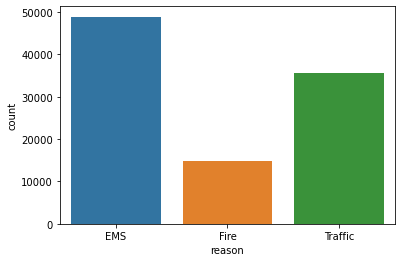

In [13]:
sns.countplot(x='reason', data=calls)

___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [14]:
type(calls['timeStamp'].iloc[0])

str

**You should have seen that these timestamps are still strings. Convert the column from strings to DateTime objects.**

In [15]:
calls['timeStamp'] = calls['timeStamp'].apply(pd.to_datetime)

In [16]:
type(calls['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
pd.to_datetime(calls['timeStamp'], infer_datetime_format=True)

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [18]:
type(calls['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [19]:
calls['hour'] = calls['timeStamp'].apply(lambda t: t.hour)

In [20]:
calls['month'] = calls['timeStamp'].apply(lambda t: t.month)

In [21]:
calls['day'] = calls['timeStamp'].apply(lambda t: t.day)

In [22]:
calls['weekday'] = calls['timeStamp'].apply(lambda t: t.weekday())

In [23]:
calls.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day,weekday
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,10,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,10,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,10,3


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

In [24]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [25]:
calls['day'] = calls['weekday'].map(dmap)

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

In [26]:
sns.set_style('whitegrid')

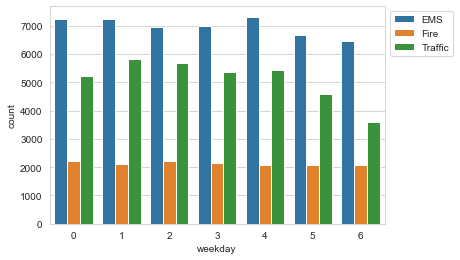

In [27]:
sns.countplot(x='weekday', hue='reason', data=calls)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

**Now do the same for Month:**

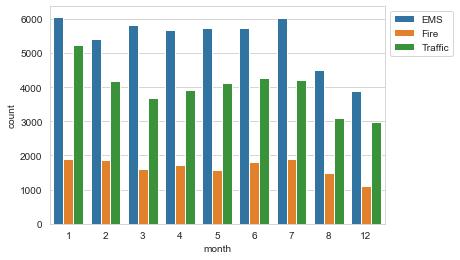

In [28]:
sns.countplot(x='month', hue='reason', data=calls)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

___
**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months**

**Now create a groupby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [29]:
byMonth = calls.groupby('month').count()

**Now create a simple plot off of the dataframe indicating the count of calls per month.**

<AxesSubplot:xlabel='month'>

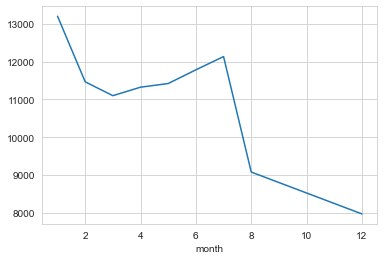

In [30]:
byMonth['e'].plot.line()

**Create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

In [31]:
byMonth.reset_index(inplace=True)

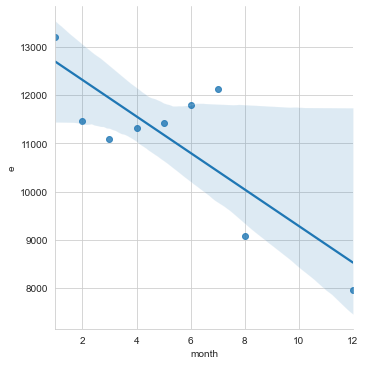

In [32]:
sns.lmplot(x='month', y='e', data=byMonth)

**Create a new column called 'Date' that contains the date from the timeStamp column.** 

In [33]:
calls['date'] = calls['timeStamp'].apply(lambda t: t.date())

In [34]:
calls.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day,weekday,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,3,2015-12-10


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

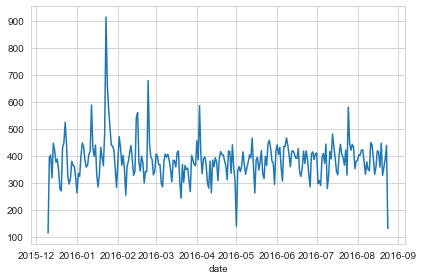

In [35]:
calls.groupby('date').count()['e'].plot.line()

plt.tight_layout()

**Recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'Traffic')

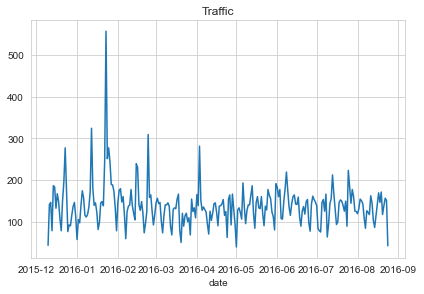

In [36]:
calls[calls['reason'] == 'Traffic'].groupby('date').count()['e'].plot.line()

plt.tight_layout()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

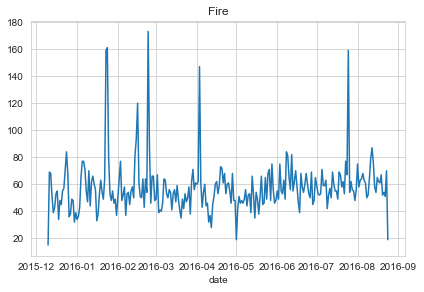

In [37]:
calls[calls['reason'] == 'Fire'].groupby('date').count()['e'].plot.line()

plt.tight_layout()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

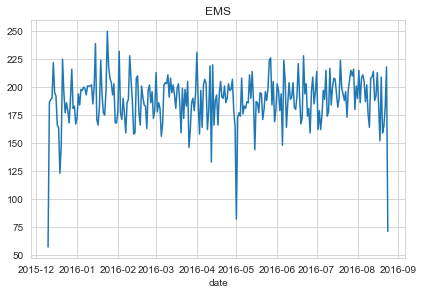

In [38]:
calls[calls['reason'] == 'EMS'].groupby('date').count()['e'].plot.line()

plt.tight_layout()
plt.title('EMS')

____
**First restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [43]:
dayHour = calls.groupby(['day', 'hour']).count()['reason'].unstack()

In [44]:
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Now create a HeatMap using this new DataFrame.**

<AxesSubplot:xlabel='hour', ylabel='day'>

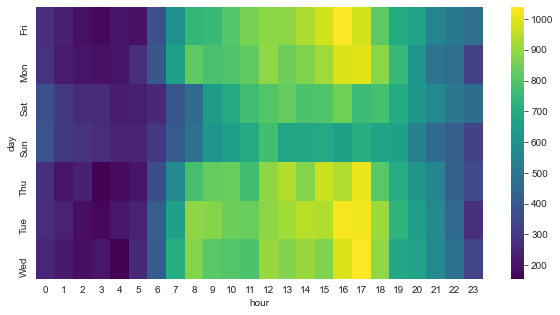

In [45]:
plt.figure(figsize=(10,5))
sns.heatmap(dayHour, cmap='viridis')

**Create a clustermap using this DataFrame.**

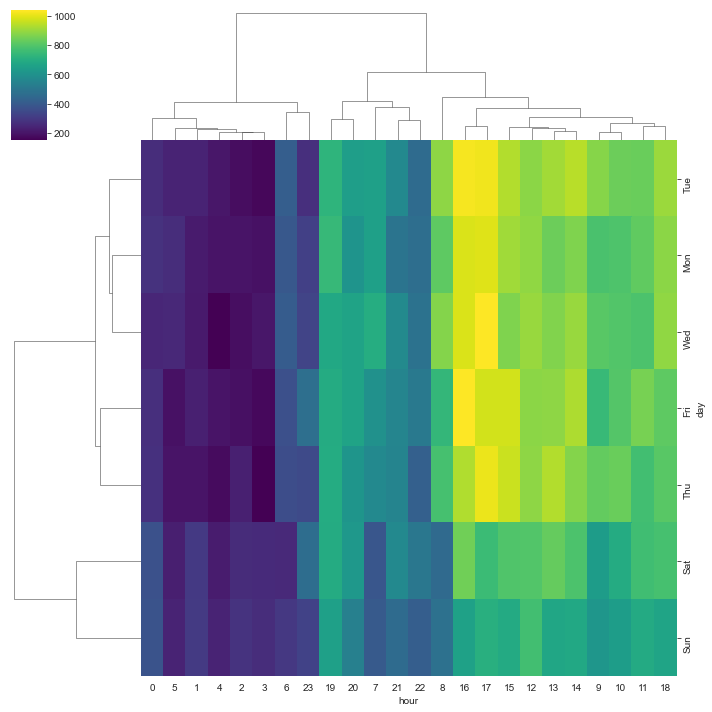

In [47]:
sns.clustermap(dayHour, cmap='viridis')

**Repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [48]:
calls.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day,weekday,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,3,2015-12-10


In [52]:
dayMonth = calls.groupby(['day', 'month']).count()['e'].unstack()

In [53]:
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='month', ylabel='day'>

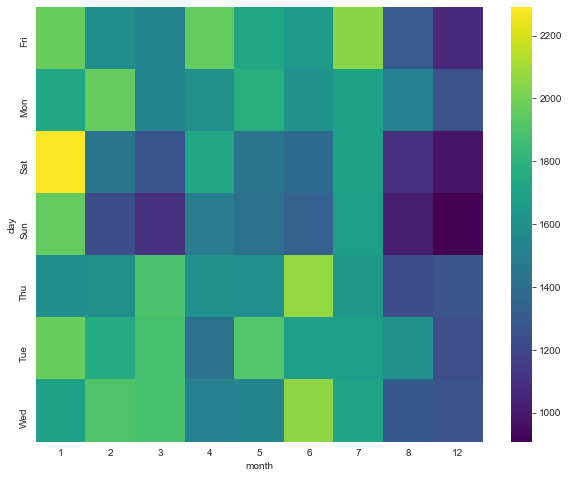

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(dayMonth, cmap='viridis')

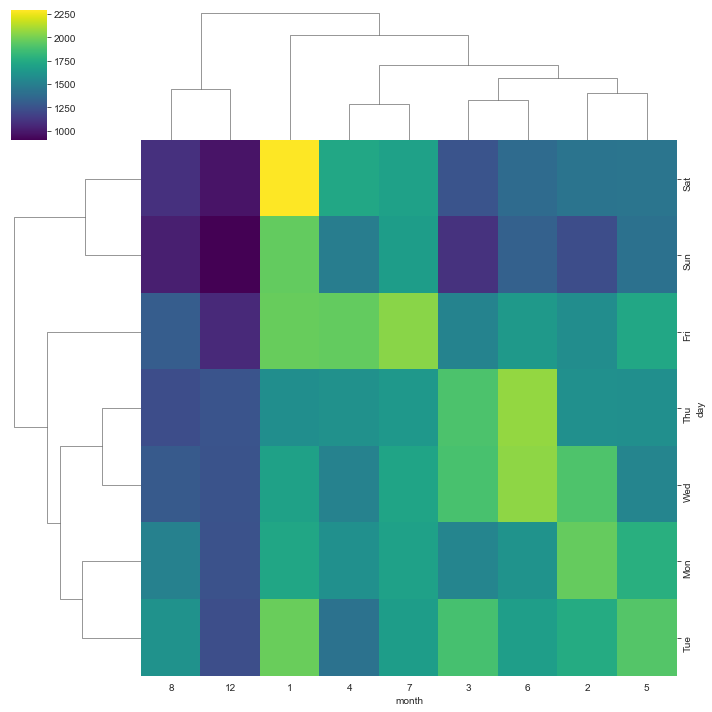

In [58]:
sns.clustermap(dayMonth, cmap='viridis')